<a href="https://colab.research.google.com/github/unknownguy24/Deep-Learning/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
key="e69ff83aab45d7956fded3a18728deb77b916560"

In [ ]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('TSLA1.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('TSLA1.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-01-29 00:00:00+00:00,349.53,350.85,338.28,339.85,4722025,23.302000,23.390000,22.552000,22.656667,70830375,0.0,1.0
1,TSLA,2018-01-30 00:00:00+00:00,345.82,348.27,342.17,345.14,4696465,23.054667,23.218000,22.811333,23.009333,70446975,0.0,1.0
2,TSLA,2018-01-31 00:00:00+00:00,354.31,356.19,345.19,347.51,6076998,23.620667,23.746000,23.012667,23.167333,91154970,0.0,1.0
3,TSLA,2018-02-01 00:00:00+00:00,349.25,359.66,348.63,351.00,4163194,23.283333,23.977333,23.242000,23.400000,62447910,0.0,1.0
4,TSLA,2018-02-02 00:00:00+00:00,343.75,351.95,340.51,348.44,3674909,22.916667,23.463333,22.700667,23.229333,55123635,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,TSLA,2023-01-19 00:00:00+00:00,127.17,129.9900,124.3082,127.260,170291880,127.17,129.9900,124.3082,127.260,170291880,0.0,1.0
1253,TSLA,2023-01-20 00:00:00+00:00,133.42,133.5100,127.3466,128.680,138858136,133.42,133.5100,127.3466,128.680,138858136,0.0,1.0
1254,TSLA,2023-01-23 00:00:00+00:00,143.75,145.3793,134.2700,135.870,203119211,143.75,145.3793,134.2700,135.870,203119211,0.0,1.0
1255,TSLA,2023-01-24 00:00:00+00:00,143.89,146.5000,141.1000,143.000,158699056,143.89,146.5000,141.1000,143.000,158699056,0.0,1.0
1256,TSLA,2023-01-25 00:00:00+00:00,144.43,146.4100,138.0700,141.905,192734347,144.43,146.4100,138.0700,141.905,192734347,0.0,1.0


In [ ]:
#df['Close'].isna().sum()

In [ ]:
#df = df['Close']

In [ ]:
#df=df.dropna()

In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1=df1.dropna()

In [ ]:
df1.head()

0    349.53
1    345.82
2    354.31
3    349.25
4    343.75
Name: close, dtype: float64

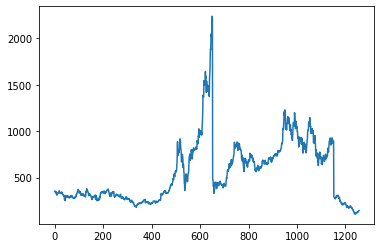

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.11331284],
       [0.11157159],
       [0.11555629],
       ...,
       [0.01673198],
       [0.01679769],
       [0.01705113]])

In [ ]:
df1.shape

(1257, 1)

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
train_data.shape

(817, 1)

In [ ]:
test_data.shape

(440, 1)

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train.shape

(716, 100, 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 118ms/step - loss: 0.0264 - val_loss: 0.0106
Epoch 2/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0109 - val_loss: 0.0044
Epoch 3/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0075 - val_loss: 0.0044
Epoch 4/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0067 - val_loss: 0.0033
Epoch 6/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0060 - val_loss: 0.0029
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 8/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 9/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0062 - val_loss: 0.0064
Epoch 10/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0059 - val_loss: 0.00

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 7ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict) #as we did minmax scaler earlier
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

641.511005762275

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

823.3454514215284

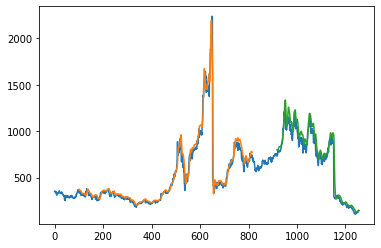

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
test_data.shape

(440, 1)

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
 # demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.0205153]
101
1 day input [0.07608476 0.07806069 0.08241616 0.0850257  0.08991622 0.0921409
 0.0863727  0.09129139 0.09182644 0.0916387  0.09432333 0.09416375
 0.09044188 0.08471124 0.07848779 0.07880694 0.08205947 0.08434515
 0.07514608 0.07375683 0.06303241 0.06633656 0.06228616 0.06102832
 0.05396006 0.05390843 0.05087649 0.0512238  0.05332645 0.04547439
 0.05221411 0.05260836 0.05347664 0.04654918 0.04990965 0.04841246
 0.05365264 0.05469692 0.05490813 0.05651796 0.05605801 0.05618943
 0.0501631  0.05031798 0.04663835 0.0417619  0.03904912 0.03261446
 0.0387769  0.04124094 0.03888485 0.04051346 0.03699341 0.03523338
 0.03383475 0.02805247 0.02900993 0.03524746 0.03508788 0.03511604
 0.03413512 0.04064487 0.04064487 0.04071997 0.03489545 0.03366109
 0.0309483  0.0306667  0.0332997  0.02802901 0.02480464 0.02285687
 0.0232652  0.01977331 0.01960435 0.01393941 0.01383146 0.00809612
 0.00706357 0.00046934 0.00216366 0.00643935 0.00707765 0.
 0.00260015 0.00105132 0.00232793 0.0054772

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1257

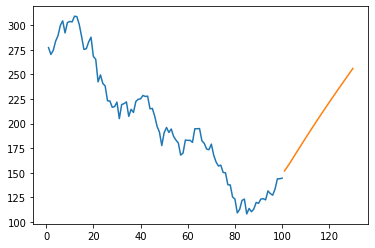

In [ ]:
 
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

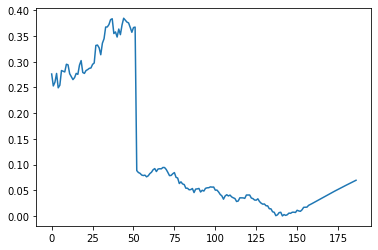

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])